# CS 425 assignment 0:  a review of machine learning

In [2]:
import numpy as np
import matplotlib.pyplot as plt

These questions are based on material covered in CS 345.  For your reference, here's a link to the [github repository](https://github.com/asabenhur/CS345/blob/master/fall23) that contains the course materials.  Links to specific relevant notebooks are provided in the coding section of the assignment.

### Short questions
1. What are hyperparameters and why is it important to find good values for them?  How is optimizing hyperparameters different than optimizing the value of classifier parameters such as the weight vector of a linear classifier?



1. **<span style="color:green">What are hyperparameters?</span>**
 
   
**Hyperpparameters are paramaters that control the classifier's training. Classifiers like the Perceptron have parameters like bias and weights that are algorithmically adjusted during training, but before that hyperparamaters that dictate the training, like the number of epochs and learning rates are set by the user.**


2. **<span style="color:green"> Why is it important to find good values for them?</span>**
   
**Its important to find good values for them because they affect not only the accuracy of the model but its performance as well. Proper adjustments can help avoid over-fitting, under-fitting, and even avoid unnecessary training time.**

3.  **<span style="color:green"> How is optimizing hyperparameter different than optimizing the value of classifier parameters such as weight vector of a linear classifier? </span>**
   
  **<p>The optimal values for the classifier parameter like the weight vector of a linear classifier are determined by the model during training. For hyper parameters we must input a variety of values for the hyperparameter and train each model using that setup and instead of evaluating each model on the test-set and picking the best one we instead evaluate on a validation set. After that evaluation we must pick the best performing model and then evaluate it further on the test set. We have the added step of using a validation set because hyperparameter should be considered as another parameter that needs to be determined algorithmically so which we don't do using a test set.</p>**

2. Give an example of a machine learning algorithm and hyperparameter values where you expect to see a large gap between its accuracy on the training set and test set (assuming a challenging enough dataset so that it does not perform perfectly on the test set).  Explain why you expect to see that behavior.

**If we have a KNN classifier and set k to 1. During training the model will classify based on only on the neighbor that is closes to it. This will lead to a very accurate
predictions in the training set because statistically the nearest neighbor is probably the same class. The downside is outliers, and invalid data will have a strong impact on the data and it will create a very intricate line of delineation that hinders its ability to generalize. So if the test data varies from the training the classifier then becomes almost useless and we will see a large gap in performance on the test set and training set**

3.  Is the following statement true or false?  Explain!  Taking a small step in the direction of the gradient of a function will lead towards a local or global minimum of the function you are trying to minimize.

**False. The gradient is the direction of steepest ascent so if were trying to minimize the function we want to move in the direction opposite to the gradient.**

4. In machine learning it is important to compare the accuracy of your classifier to a simple baseline.  List multiple reasons why that is the case.


a)  **It could save time and resources if the model were using is more complex and resource intensive but only provides minimal improvement from the baseline model.**
   
b)  **It also gives perspective on how difficult the problem the model is solving can be by giving us a point of reference. Say the baseline model is only accurate 25% of the time but our model is 40%. So even though 40% is pretty bad in isolation comparing it to the 25% of the baseline shows that the problem is pretty difficult to solve.**
   
c)  **The point of reference provided can also give us the ability to start measuring the efficacy of the model. So as before even though 40% in isolation is bad the comparison to the 25% of the baseline model shows we are going in the right direction of solving the problem.** 

d)  **Comparing could also reveal any over fitting that is occurring. So if the model is more accurate on the training data than the baseline model but worse in the test data we can determine there is some over fitting happening in our model.**

## Coding questions

### Question 1

Plot the accuracy of random forests as a function of the number of trees that are used in the ensemble (accessed in scikit-learn using the `n_estimators` attribute).  Use the Leukemia dataset described below.  In your plot, compute accuracy using ten-fold cross-validation.
Choose a wide enough range of values for the number of trees that illustrates the behavior as a function of this hyperparameter.  Is overfitting observed at any point in your plot?  Explain!  In your code do not use the scikit-learn `validation_curve` function.

For your reference, here's the notebook I used for presenting the topic of [random forests](https://github.com/asabenhur/CS345/blob/master/fall23/notebooks/module06_02_ensemble_methods.ipynb) in CS 345.


**The Leukemia gene expression dataset**

This dataset looks at biological samples taken from leukemia patients with two types of leukemia: acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL) and measures the expression of over 7,000 genes using DNA microarrays.  The technology of DNA microarrays as a way of probing gene expression has since been replaced by next generation sequencing, which will be covered later in the course.  However, the analysis opportunities remain similar.  The data was taken from the following publication:

> Golub, Todd R., et al. "Molecular classification of cancer: class discovery and class prediction by gene expression monitoring." Science  (1999): 531-537.

Here's code for creating the feature matrix and label vector:

In [3]:
import requests
# if you don't have requests installed you can use urlopen which is part
# of the python standard library
# from urllib.request import urlopen
link = "https://web.stanford.edu/~hastie/CASI_files/DATA/leukemia_big.csv"
# retrieve the contents of the file
contents = requests.get(link)
lines = contents.text.split()
# the data is in csv format and the labels appear in the first 
# row of the dataset:
class_convert = {'ALL':1, 'AML':0}
y = np.array([class_convert[token] for token in lines[0].split(',')])
X = np.array([ [float(token) for token in line.split(',')] 
              for line in lines[1:] ])
X = X.transpose()
X.shape,y.shape

((72, 7128), (72,))

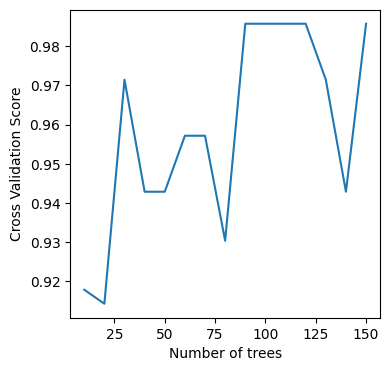

    Number of Trees  Cross Val Test Score  Training Score  Computational Cost
0                10              0.917857             1.0            0.041040
1                20              0.914286             1.0            0.074653
2                30              0.971429             1.0            0.109139
3                40              0.942857             1.0            0.147248
4                50              0.942857             1.0            0.193483
5                60              0.957143             1.0            0.217471
6                70              0.957143             1.0            0.254396
7                80              0.930357             1.0            0.285157
8                90              0.985714             1.0            0.322890
9               100              0.985714             1.0            0.352451
10              110              0.985714             1.0            0.375667
11              120              0.985714             1.0       

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt


#
ntrees = np.arange(10,151,10)

scores = []
train_scores = []
computational_cost = []

for ntree in ntrees:
    clf = RandomForestClassifier(n_estimators= ntree)
    score = cross_validate(clf, X, y, cv=10, return_train_score=True)
    scores.append(np.mean(score['test_score']))
    train_scores.append(np.mean(score['train_score']))
    computational_cost.append(np.mean(score['fit_time']))

fig = plt.figure(figsize=(4,4))
plt.xlabel('Number of trees')
plt.ylabel('Cross Validation Score')
plt.plot(ntrees, scores)
plt.show()


import pandas as pd
table = pd.DataFrame({'Number of Trees':ntrees, 'Cross Val Test Score':scores, 'Training Score':train_scores, 'Computational Cost':computational_cost})
df = pd.DataFrame(table)

print(df)

### Question 2

Compute the accuracy of a non-linear SVM with Gaussian kernel on the Leukemia dataset using ten-fold cross-validation with optimal hyperparameters chosen using nested cross-validation.
In your analysis perform model selection over the value of the soft-margin constant and the width parameter of the Gaussian kernel.  For each hyperparameter choose a wide enough range of values that makes sense.  
Compare the performance of the non-linear SVM to that of a linear SVM where you select an optimal value of the soft-margin constant, again using nested cross-validation..  Hint:  It is possible to get similar performance using the non-linear SVM.

Here are links to some of the notebooks from CS 345 where I presented SVMs and model selection:

*  Linear SVMs ([notebook](https://github.com/asabenhur/CS345/blob/master/fall23/notebooks/module02_04_svm.ipynb))
*  Non-linear SVMs and kernels ([notebook](https://github.com/asabenhur/CS345/blob/master/fall23/notebooks/module04_03_kernels.ipynb))
*  Model selection using a validation set ([notebook](https://github.com/asabenhur/CS345/blob/master/fall23/notebooks/module05_01_hyperparameters_validation_set.ipynb))
*  Model selection using nested cross-validation ([notebook](https://github.com/asabenhur/CS345/blob/master/fall23/notebooks/module05_03_model_selection.ipynb))


In [5]:
# your code here